In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
import torch

# Loading the image
Loading the image with Pillow, lead to an undesired result, hence I load the image using opencv.

In [2]:
image_path = "../../datasets/sketch-parse/images/5.png"
mask_path = "../../datasets/sketch-parse/masks/5.png"

In [3]:
image = cv.imread(image_path)
mask = cv.imread(mask_path)

In [4]:
mask[mask != 0] = 255

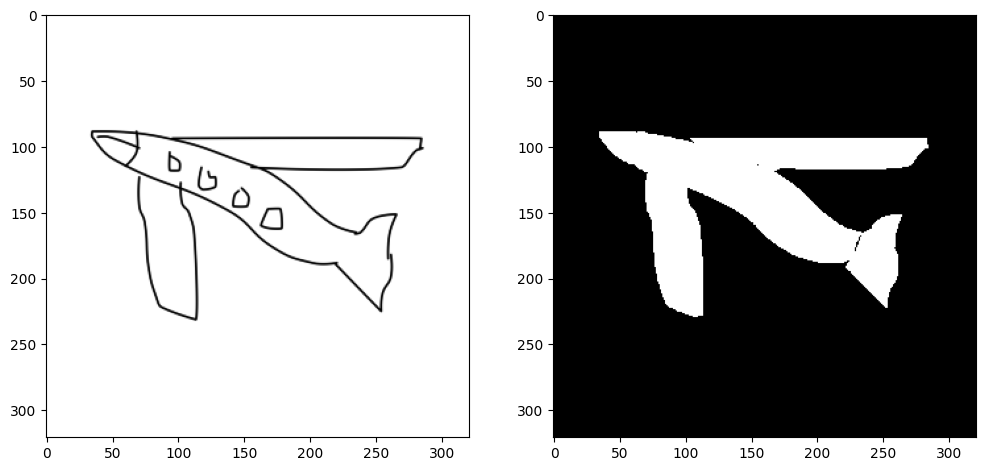

In [5]:
fig = plt.figure(figsize=(12,6))
fig.add_subplot(1,2,1)
plt.imshow(image)
fig.add_subplot(1,2,2)
plt.imshow(mask)
plt.show()

## Preparing the target

In [6]:
mask[mask == 255] = 1

## Create box

In [7]:
positions = np.where(mask)
x_min = np.min(positions[1])
x_max = np.max(positions[1])
y_min = np.min(positions[0])
y_max = np.max(positions[0])
x_min, y_min, x_max, y_max

(35, 89, 284, 229)

In [8]:
image.shape

(321, 321, 3)

In [9]:
image[y_min:y_max+1, x_min] = [255, 0, 0]
image[y_min:y_max+1, x_max] = [255, 0, 0]
image[y_min, x_min:x_max+1] = [255, 0, 0]
image[y_max, x_min:x_max+1] = [255, 0, 0]

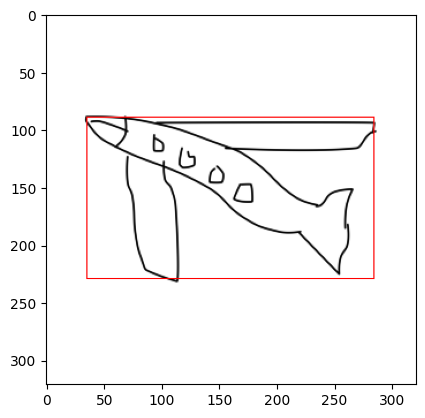

In [10]:
plt.imshow(image)

## Prepare Data to be used for training

In [11]:
images_path = "../../datasets/sketch-parse/images"
masks_path = "../../datasets/sketch-parse/masks"

In [12]:
image_directory = Path(images_path)
mask_directory = Path(masks_path)

sorted_image_directory = sorted(image_directory.iterdir(), key = lambda x: x.name)
sorted_mask_directory = sorted(mask_directory.iterdir(), key = lambda x: x.name)

In [13]:
sorted_image_files = [item for item in sorted_image_directory if item.is_file()]
sorted_mask_files = [item for item in sorted_mask_directory if item.is_file()]

In [14]:
if len(sorted_image_files) == len(sorted_mask_files):
    print(f"Found { len(sorted_image_files) } images and { len(sorted_mask_files) } masks.")

Found 987 images and 987 masks.


In [15]:
X = torch.zeros(len(sorted_image_files), 3, 321, 321)